In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
import bambi as bmb
import statsmodels.api as sm
import xarray as xr

In [3]:
import os
n_devices = 16
os.environ["XLA_FLAGS"] = "--xla_force_host_platform_device_count={}".format(n_devices)
os.environ['JAX_PLATFORMS'] = 'cpu'  # BlackJAX NUTS sampler seems to have issues with JAX

In [4]:
import jax
import jax.numpy as jnp
import numpy as np
import pandas as pd

In [5]:
# Load up data from statsmodels
data = sm.datasets.get_rdataset("dietox", "geepack").data
data.describe()

,Pig,Litter,Start,Weight,Feed,Time
count,861.000000,861.000000,861.000000,861.000000,789.000000,861.000000
mean,6238.319396,12.135889,25.672701,60.725769,80.728645,6.480836
std,1323.845928,7.427252,3.624336,24.978881,52.877736,3.444735
min,4601.000000,1.000000,15.000000,15.000000,3.300003,1.000000
25%,4857.000000,5.000000,23.799990,38.299990,32.800003,3.000000
50%,5866.000000,11.000000,25.700000,59.199980,74.499996,6.000000
75%,8050.000000,20.000000,27.299990,81.199950,123.000000,9.000000
max,8442.000000,24.000000,35.399990,117.000000,224.500000,12.000000


In [6]:
model = bmb.Model("Weight ~ Time + (Time|Litter)", data)

In [7]:
model.build()

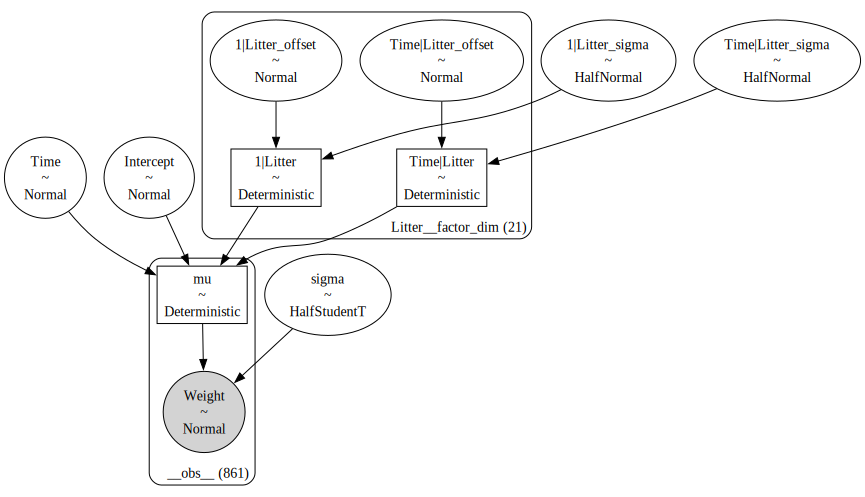

In [8]:
model.graph()

In [9]:
results = model.fit(nuts_sampler='blackjax', chains=n_devices, progressbar=False)

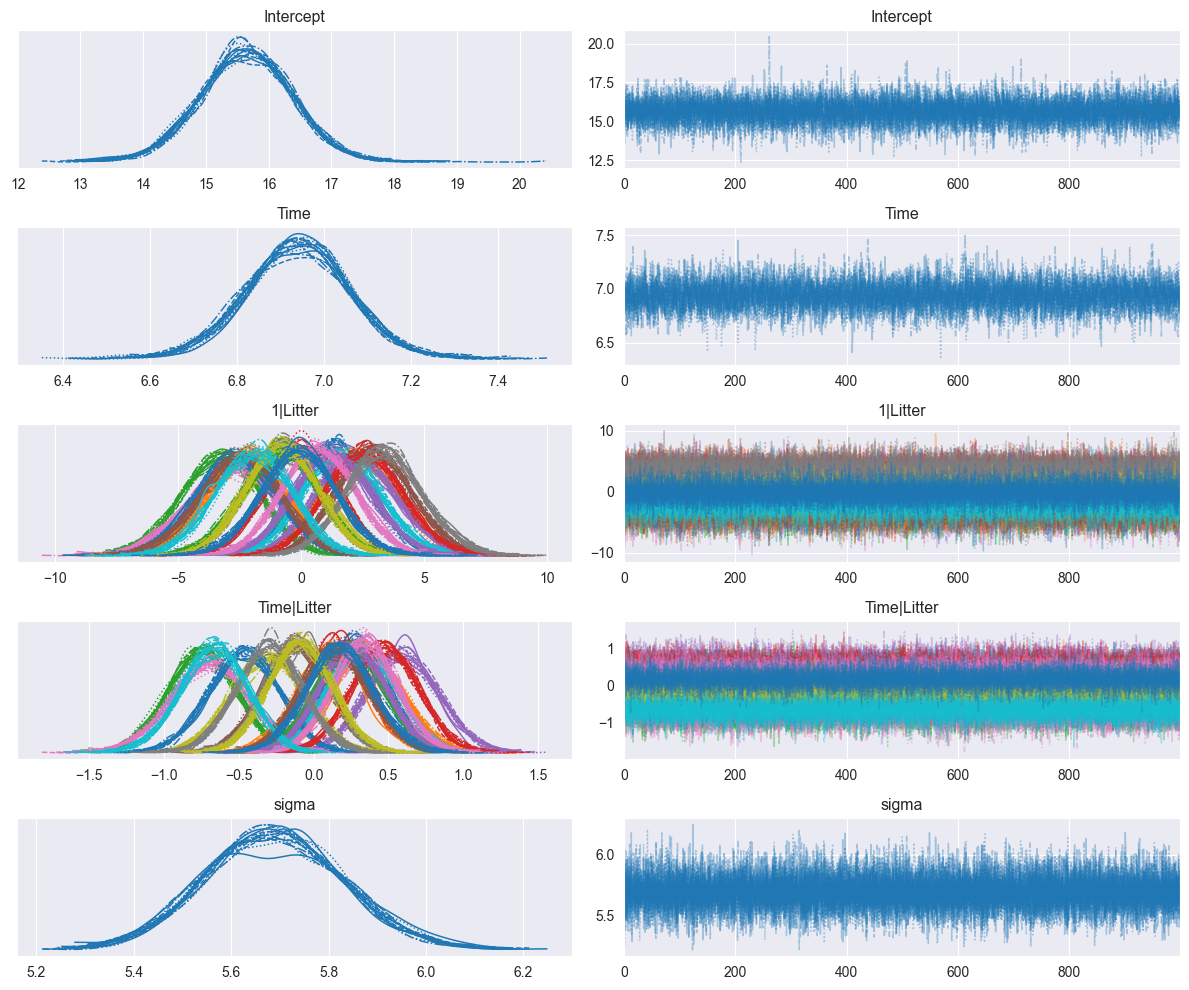

In [11]:
# Plot posteriors
az.plot_trace(
    results,
    var_names=["Intercept", "Time", "1|Litter", "Time|Litter", "sigma"],
    compact=True,
)
plt.tight_layout()